# Gauss and Substitution
In order to interpolate using the Cubic SP-Line method we need to run the _Gaussian Reduction_ method to obtain a triangular matrice and the _Substitution_ to obtain a solution.

## Gauss
The Gaussian Reduction works on the annihilition of the terms under the pivots of the matrice (those being the elements under the main diagonal).

## Substitution
The Substitution method thrives upon the presence of an upper-triangular matrice, who simplifies the computation of the result. Here is a visual representation of the substitution method using the matrice $A$, the known terms vector $b$.

$$
A=\left[\begin{array}{cc}1&2&3\\0&1&2\\0&0&1\end{array}\right],\space
b=\left[\begin{array}{cc}1\\2\\3\end{array}\right],\space
x*=\left[\begin{array}{cc}\frac{(1-3\cdot3-3\cdot(-4))}1\\\frac{(2-2\cdot3)}1\\\frac31\end{array}\right]
$$


In [ ]:
def substitution(box):
  """
  Computes a solution of a triangular system using substitution;
  being the matrice (A|b) triangular it is possible to compute it with
        [1,2,3][1]         [(1-3*3-3*(-4))/1]
  A|b = [0,1,2][2] => x* = [(2-2*3)/1]
        [0,0,1][3]         [3/1]

  Parameters:
  - box (matrice): a matrice containing A|b, where A is the matrice containing
                   the coefficients of the system's variables and b the known
                   terms
  Return:
  - x* (vector): a vector representing the solution to the system
  """
  n = len(box)
  x = [0 for _ in range(len(box))]
  for i in range(n-1,-1,-1):
    tmp = 0.0
    for j in range(n-1,i,-1):
      tmp += box[i][j]*x[j]

    x[i] =  (box[i][n]-tmp)/box[i][i]

  return x

def gauss(box):
  """
  The Gaussian Reduction (at least part of that) is used to "triangularise" a
  matrice, obtaining an upper-triangular one with the same characteristics as
  the starting one.

  Parameters:
  - box (matrice): a matrice containing A|b, where A is the matrice containing
                   the coefficients of the system's variables and b the known
                   terms
  Return:
  - box (matrice): the same box provided as parameter, but "triangularised"
  """
  for k in range(len(box)-1):
    pivot = box[k][k]
    for i in range(k+1,len(box)):
      const = box[i][k]/pivot
      for j in range(k,len(box[0])):
        box[i][j] -= const*box[k][j]

  return box

# Box Generator
The box generator is used to dynamically generate an equation system suitable for the Cubic SP-Line method, which needs a matrice that looks like this:

$$
A=\left[\begin{array}{cc}4&1&0\\1&4&1\\0&1&4\end{array}\right]
$$

The vector $b$ is calculated with the formula:

$$
b_k=6\cdot(y_k-2y_{k+1}+y_{k+2})
$$

In [ ]:
import numpy as np

def box_gen(ys):
  """
  Generates a box, with 4s on the diagonal,
  1s on the anti- and post-diagonal.
  Finally computes the b vector of the box based
  on the y points array.

  Parameters:
  - ys (array): an array of numbers representing the ordinates
                of the interpolation
  Return:
  - box (matrice): an array containing the box used to compute the zs
  """
  z_size = len(ys) - 2
  box = np.zeros((z_size, z_size + 1))
  for i in range(z_size):
    for j in range(z_size + 1):
      if i == j:
        box[i][j] = 4
      elif (i == j - 1 or i == j + 1) and j != z_size:
        box[i][j] = 1
      elif j == z_size:
        box[i][j] = 6*(ys[i]-2*ys[i+1]+ys[i+2])
      else:
        box[i]

  return box

# Quadratic SP-Line
The Quadratic SP-Line is a method to approximate a function a using piece-wise defined functions that best approximate it between the interval. SP-Lines take an array of xs and an array of ys and compute said piece-wise functions between said points.

First we have to calculate the $z_k$ values that are used to compose the polynomial, using this formula ($z_0$ is normally defaulted to $0$):

$$
z_{k+1}=-z_k+2\frac{y_{k+1}-y_k}{x_{k+1}-y_k}
$$

The formula defining the structure of said polynomial is this:

$$
f_k(x)=y_k+z_k(x-x_k)+\frac{z_{k+1}-z_k}{2(x_{k+1}-x_k)}(x-x_k)^2
$$

In [ ]:
def quadratic_spline(xs, ys, z0=0):
  """
  Interpolates a set of points using the Quadratic SP-Line Method.
  The Quadratic SP-Line first computes the zs ...

  Parameters:
  - xs (array):  the x coordinates of the interpolated points
  - ys (array):  the y coordinates of the interpolated points
  - z0 (number): the first z is determined by the user (default = 0)
  Return:
  - fs (lambda array): an array containing the functions defined in between the
                       different xs of the points; for example if the xs are
                       [0, 1, 2, 3], there will be a function defining the
                       interpolation between 0 and 1, 1 and 2, and so on.
  """
  zs = [0 for _ in range(len(xs))]
  zs[0] = z0
  fs = []
  for k in range(len(zs) - 1):
    zs[k+1] = -zs[k]+2*(ys[k+1]-ys[k])/(xs[k+1]-xs[k])
    f = lambda x, k=k: ys[k]+zs[k]*(x-xs[k])+(zs[k+1]-zs[k])/(2*(xs[k+1]-xs[k]))*(x-xs[k])**2
    fs.append(f)

  return fs

# Cubic SP-Line
The Cubic SP-Line is a method to approximate a function using a piece-wise defined function that best approximates it between an interval.
SP-Lines take an array of xs and an array of ys and compute said piece-wise functions between said points.
The formula defining the structure of said polynomial is this:

$$
f_k(x)=\frac{z_{k+1}(x-x_k)^3+z_k(x_{k+1}-x)^3}{6h_k}+\bigg(\frac{y_{k+1}}{h_k}-\frac{h_k}6z_{k+1}\bigg)(x-x_k)+\bigg(\frac{y_k}{h_k}-\frac{h_k}{6}z_k\bigg)(x_{k+1}-x)
$$

In [ ]:
def cubic_spline(xs, ys):
  """
  Interpolates a set of points using the Cubic SP-Line Method.
  The Cubic SP-Line first computes the zs using a system and solving it using
  the Gaussian Reduction and Substitution.
  The first and last z are by default 0, as for the specification for the
  natural SP-Line.
  Then for every range in between two xs, a polynomial is calculated using the
  formula described overhead.

  Parameters:
  - xs (array): the x coordinates of the interpolated points
  - ys (array): the y coordinates of the interpolated points
  Return:
  - fs (lambda array): an array containing the functions defined in between the
                       different xs of the points; for example if the xs are
                       [0, 1, 2, 3], there will be a function defining the
                       interpolation between 0 and 1, 1 and 2, and so on.
  """
  box = box_gen(ys)
  zs = substitution(gauss(box))
  # first and last z are always 0 for natural cubic SP-Lines
  zs.insert(0, 0)
  zs.append(0)

  hs = [0 for _ in range(len(xs) - 1)]
  fs = []
  for k in range(len(xs) - 1):
    hs[k] = xs[k+1] - xs[k]
    action = lambda x, k=k: (((zs[k+1]*(x - xs[k])**3+zs[k]*(xs[k+1]-x)**3)/(6*hs[k]))+((ys[k+1]/hs[k])-(hs[k]/6)*zs[k+1])*(x-xs[k])+((ys[k]/hs[k])-((hs[k]/6)*zs[k]))*(xs[k+1]-x))
    fs.append(action)

  return fs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def eval(x, xs, spline):
  """
  Evaluates an x into a set of polynomials resulting from an SP-Line, choosing
  the right one for the range.

  Parameters:
  - x (number):     the x to evaluate
  - xs (array):     the set of xs
  - spline (array): the set of polynomials
  Return:
   - y: the evalued y of the SP-Line
  """
  for k in range(len(spline)):
    if x >= xs[k] and x <= xs[k + 1]:
      return spline[k](x)


def plot_of(xs, ys, f, quad, cubc):
  """
  Prints the plots that compares the different SP-Lines with the function

  Parameters:
  - xs (array):   the x coordinates
  - ys (array):   the y coordinates
  - f (lambda):   the original function
  - quad (array): array of function obtained from the quadratic SP-Line
  - cubc (array): array of function obtained from the cubic SP-Line
  """
  fig = plt.figure()
  ax = fig.add_subplot()
  ax.set_title('SP-Lines Comparison')

  x = np.linspace(xs[0], xs[-1], 1000)
  y = []

  for evl in x:
    y.append(f(evl))

  ax.plot(x,y, linestyle=':', c='#6d6d6d')

  y = []
  for evl in x:
    y.append(eval(evl, xs, quad))

  ax.plot(x, y, c='r')

  y = []
  for evl in x:
    y.append(eval(evl, xs, cubc))

  ax.plot(x, y, c='b')

  ax.spines['left'].set_position('center')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_position('center')
  ax.spines['top'].set_color('none')

  ax.grid()

  plt.show()

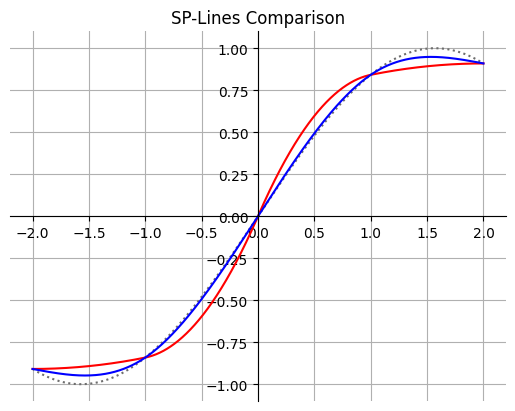

f( 1.5 )= 0.9974949866040544
q( 1.5 )= 0.8923408163212354
c( 1.5 )= 0.947913381703362


In [ ]:
import math
import numpy as np

# Given xs
xs = [-2, -1, 0, 1, 2]

# Original function
f = lambda x : math.sin(x)

# Set of xs and ys of the function
ys = [f(xs[0]), f(xs[1]), f(xs[2]), f(xs[3]), f(xs[4])]

quad = quadratic_spline(xs, ys)
cubc = cubic_spline(xs, ys)

evl = 1.5
evl_f = f(evl)
evl_q = eval(evl, xs, quad)
evl_c = eval(evl, xs, cubc)

plot_of(xs, ys, f, quad, cubc)

print("f(",evl,")=",evl_f)
print("q(",evl,")=",evl_q)
print("c(",evl,")=",evl_c)



Authors: Luca Mazza & Ivo Herceg © 2024